In [ ]:
#Gauss potencna
import math
niter = 100
epsilon = 1e-5
value = 0.
star = 0.
z = 2

for n in range(0, niter+1):
    star = value
    val = (-1)**n * z**(2*n + 1) / (math.factorial(n) * (2*n + 1))
    value += val * 2 / math.sqrt(math.pi)
    
    print(f"Iteracija {n}")
    print(f"Stari\t{star:.16f}")
    print(f"Novi\t{value:.16f}")
    print()
    
    if abs(value - star) < epsilon * star or value == star or n==niter:
        print(f"Koncam z rezultatom {value:.16f}, tocno {math.erf(z):.16f}, relativna razlika {(value-math.erf(z))/math.erf(z):.16e}")
        break
    
    
def potencna(z, niter, epsilon):
    value = 0.
    if z==0:
        return value
    star = 0.
    for n in range(0, niter+1):
        star = value
        val = (-1)**n * z**(2*n + 1) / (math.factorial(n) * (2*n + 1))
        value += val * 2 / math.sqrt(math.pi)
        
        if abs(value - star) < epsilon * star or value == star or n==niter:
            break
    return value

def potencna_erfc(z, niter, epsilon):
    return 1 - potencna(z, niter, epsilon)

    

Iteracija 0
Stari	0.0000000000000000
Novi	2.2567583341910251

Iteracija 1
Stari	2.2567583341910251
Novi	-0.7522527780636752

Iteracija 2
Stari	-0.7522527780636752
Novi	2.8585605566419656

Iteracija 3
Stari	2.8585605566419656
Novi	-0.5803092859348347

Iteracija 4
Stari	-0.5803092859348347
Novi	2.0943672582915656

Iteracija 5
Stari	2.0943672582915656
Novi	0.3436698838888308

Iteracija 6
Stari	0.3436698838888308
Novi	1.3312427617570401

Iteracija 7
Stari	1.3312427617570401
Novi	0.8421590508127841

Iteracija 8
Stari	0.8421590508127841
Novi	1.0579312762293676

Iteracija 9
Stari	1.0579312762293676
Novi	0.9721271164145858

Iteracija 10
Stari	0.9721271164145858
Novi	1.0031800504427926

Iteracija 11
Stari	1.0031800504427926
Novi	0.9928699853899492

Iteracija 12
Stari	0.9928699853899492
Novi	0.9960317386728211

Iteracija 13
Stari	0.9960317386728211
Novi	0.9951309542617465

Iteracija 14
Stari	0.9951309542617465
Novi	0.9953705717898156

Iteracija 15
Stari	0.9953705717898156
Novi	0.9953107962344263

In [4]:
#Gauss racionalna
import math
niter = 100
epsilon = 1e-5
value = 0.
star = 0.
z = 2

p = 0.3275911
a = 0.254829592
b = -0.284496736
c = 1.421413741
d = -1.453152027
e = 1.061405429

def racaprox(z):
    if z==0:
        return 0
    t = 1 / (1 + p * z)
    return 1 - (a*t + b*t**2 + c*t**3 + d*t**4 + e*t**5) * math.exp(-z**2)

def racaprox_erfc(z):
    return 1 - racaprox(z)



In [5]:
#Gauss asimptotska
import math
from scipy.special import factorial2, erf

z = 2
niter = 100
epsilon = 1e-5
value = 1 - 1 / (z * math.sqrt(math.pi) * math.exp(z**2))
star = 0.0
erfc = 1 / (z * math.sqrt(math.pi) * math.exp(z**2))
old_erfc = 0.0

for m in range(1, niter + 1):
    star = value
    val = factorial2(2 * m - 1, exact=True) / (-2 * z**2) ** m
    old_erfc = erfc
    erfc = val / (2 * z * math.sqrt(math.pi) * math.exp(z**2))

    if abs(erfc) > abs(old_erfc):
        print(f"Koncam z rezultatom {value:.16f}, tocno {erf(z):.16f}, relativna razlika {(value - erf(z)) / erf(z):.16e}")
        break

    value += erfc

    print(f"Iteracija {m}")
    print(f"Stari\t{star:.16f}")
    print(f"erfc\t{erfc:.16f}")
    print(f"Novi\t{value:.16f}")
    print()

    if abs(value - star) < epsilon * abs(star) or value == star or m == niter:
        print(f"Koncam z rezultatom {value:.16f}, tocno {erf(z):.16f}, relativna razlika {(value - erf(z)) / erf(z):.16e}")
        break


def asimptotska(z, niter, epsilon):
    if z==0:
        return 0.0
    value = 1 - 1 / (z * math.sqrt(math.pi) * math.exp(z**2))
    star = 0.0
    erfc = 1 / (z * math.sqrt(math.pi) * math.exp(z**2))
    old_erfc = 0.0

    for m in range(1, niter + 1):
        star = value
        val = factorial2(2 * m - 1, exact=True) / (-2 * z**2) ** m
        old_erfc = erfc
        erfc = val / (2 * z * math.sqrt(math.pi) * math.exp(z**2))

        if abs(erfc) > abs(old_erfc):
            break

        value += erfc

        if abs(value - star) < epsilon * abs(star) or value == star or m == niter:
            break
    return value

def asimptotska_erfc(z, niter, epsilon):
    return 1 - asimptotska(z, niter, epsilon)


Iteracija 1
Stari	0.9948332536614770
erfc	-0.0003229216461577
Novi	0.9945103320153194

Iteracija 2
Stari	0.9945103320153194
erfc	0.0001210956173091
Novi	0.9946314276326285

Iteracija 3
Stari	0.9946314276326285
erfc	-0.0000756847608182
Novi	0.9945557428718103

Iteracija 4
Stari	0.9945557428718103
erfc	0.0000662241657159
Novi	0.9946219670375261

Koncam z rezultatom 0.9946219670375261, tocno 0.9953222650189527, relativna razlika -7.0358918517032527e-04


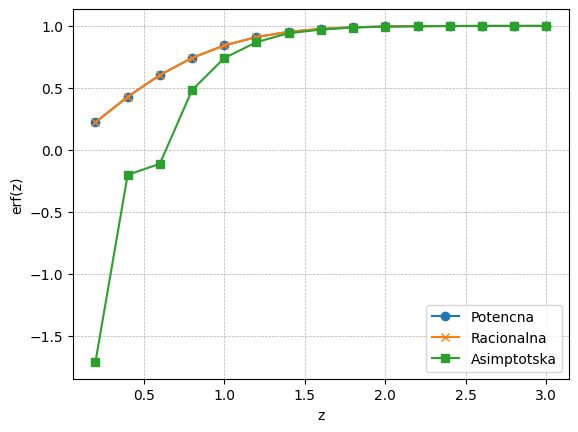

In [6]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(0.2, 3.2, 0.2)
y1 = [potencna(zi, 100, 1e-5) for zi in z]
y2 = [racaprox(zi) for zi in z]
y3 = [asimptotska(zi, 100, 1e-5) for zi in z]

plt.plot(z, y1, "o-", label="Potencna")
plt.plot(z, y2, "x-", label="Racionalna")
plt.plot(z, y3, "s-", label="Asimptotska")
plt.xlabel("z")
plt.ylabel("erf(z)")
#plt.yscale("log")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


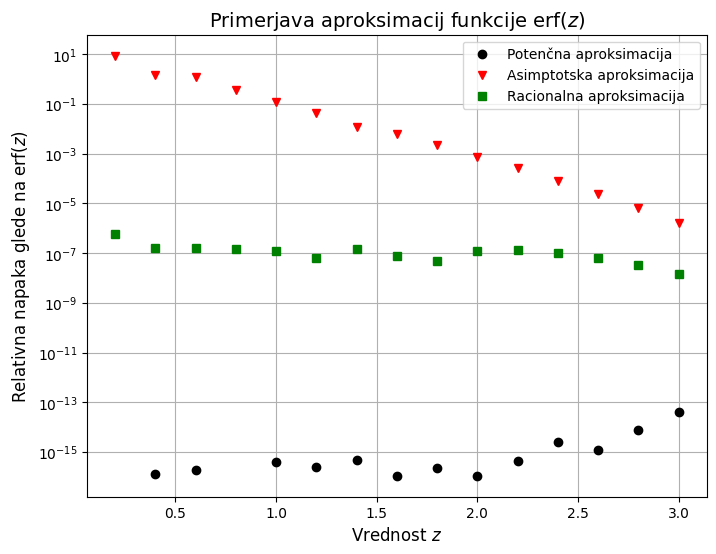

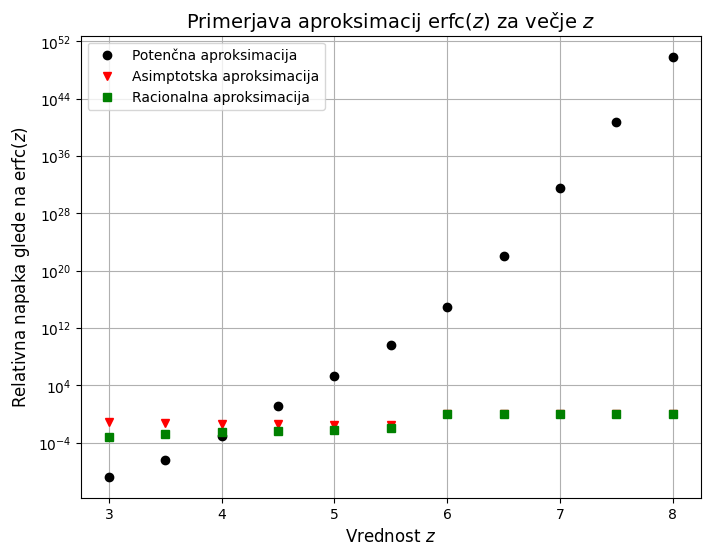

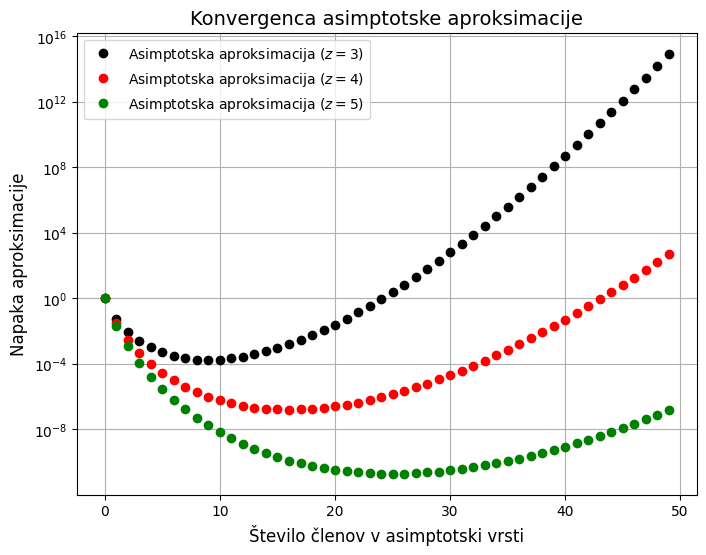

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math


tabela1 = [[potencna(i / 10, 100, 1e-16), asimptotska(i / 10, 100, 1e-16), racaprox(i / 10), math.erf(i / 10)] 
           for i in range(0, 32, 2)]
tabela2 = [[potencna_erfc(i / 10, 100, 1e-16), asimptotska_erfc(i / 10, 100, 1e-16), racaprox_erfc(i / 10), math.erfc(i / 10)] 
           for i in range(30, 85, 5)]
tabela3 = [[potencna(i / 10, 100, 1e-16), asimptotska(i / 10, 100, 1e-16), racaprox(i / 10), math.erf(i / 10)] 
           for i in range(30, 85, 5)]


napake1 = [[abs(tabela1[i][j] - tabela1[i][3]) / tabela1[i][3] for j in range(3)] for i in range(1, len(tabela1))]
napake2 = [[abs(tabela2[i][j] - tabela2[i][3]) / tabela2[i][3] for j in range(3)] for i in range(len(tabela2))]

napake1_pot, napake1_asi, napake1_rac = zip(*napake1) if napake1 else ([], [], [])


plt.figure(figsize=(8, 6))
plt.plot(np.arange(0.2, 3.2, 0.2), np.array(napake1_pot), 'ko', label="Potenčna aproksimacija")
plt.plot(np.arange(0.2, 3.2, 0.2), np.array(napake1_asi), 'rv', label="Asimptotska aproksimacija")
plt.plot(np.arange(0.2, 3.2, 0.2), np.array(napake1_rac), 'gs', label="Racionalna aproksimacija")
plt.yscale('log')
plt.xlabel('Vrednost $z$', fontsize=12)
plt.ylabel('Relativna napaka glede na $\\operatorname{erf}(z)$', fontsize=12)
plt.title('Primerjava aproksimacij funkcije $\\operatorname{erf}(z)$', fontsize=14)
plt.legend()
plt.grid(True)
#plt.savefig("primerjava_aproksimacij_erf.pdf")
plt.show()


napake2_pot, napake2_asi, napake2_rac = zip(*napake2) if napake2 else ([], [], [])


plt.figure(figsize=(8, 6))
plt.plot(np.arange(3, 8.5, 0.5), np.array(napake2_pot), 'ko', label="Potenčna aproksimacija")
plt.plot(np.arange(3, 8.5, 0.5), np.array(napake2_asi), 'rv', label="Asimptotska aproksimacija")
plt.plot(np.arange(3, 8.5, 0.5), np.array(napake2_rac), 'gs', label="Racionalna aproksimacija")
plt.yscale('log')
plt.xlabel('Vrednost $z$', fontsize=12)
plt.ylabel('Relativna napaka glede na $\\operatorname{erfc}(z)$', fontsize=12)
plt.title('Primerjava aproksimacij $\\operatorname{erfc}(z)$ za večje $z$', fontsize=14)
plt.legend()
plt.grid(True)
#plt.savefig("primerjava_aproksimacij_erfc.pdf")
plt.show()


def ak(z):
    nf = 1
    x = 0
    tabela3 = []
    for i in range(0, 50):
        nf = nf * (2 * i - 1)
        x = nf / ((-2 * z**2) ** i)
        tabela3.append(abs(x))
    return tabela3


plt.figure(figsize=(8, 6))
plt.plot(np.array(ak(3)), 'ko', label="Asimptotska aproksimacija ($z=3$)")
plt.plot(np.array(ak(4)), 'ro', label="Asimptotska aproksimacija ($z=4$)")
plt.plot(np.array(ak(5)), 'go', label="Asimptotska aproksimacija ($z=5$)")
plt.yscale('log')
plt.xlabel('Število členov v asimptotski vrsti', fontsize=12)
plt.ylabel('Napaka aproksimacije', fontsize=12)
plt.title('Konvergenca asimptotske aproksimacije', fontsize=14)
plt.legend()
plt.grid(True)
#plt.savefig("konvergenca_asimptot.pdf")
plt.show()


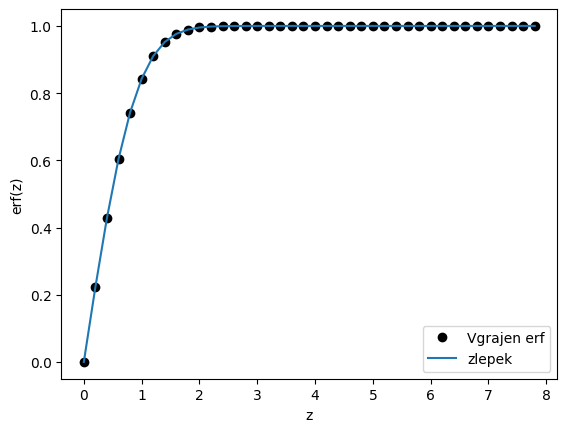

In [ ]:
def er(z, niter=100, epsilon=1e-5):
    if z < 1:
        return potencna(z, niter, epsilon)
    elif z >= 1 and z < 4:
        return racaprox(z)
    else:
        return asimptotska(z, niter, epsilon)

err = []
xerr = []
for i in range(0, 80, 2):
    xerr.append(i / 10)
    err.append(er(i / 10, 100, 1e-16))

erp = []
xerp = []
for i in range(0, 80, 2):
    xerp.append(i / 10)
    erp.append(math.erf(i / 10))

plt.plot(np.array(xerp), np.array(erp), 'ko', np.array(xerr), np.array(err))
plt.legend(('Vgrajen erf', 'zlepek'), loc='lower right')
plt.xlabel('z')
plt.ylabel('erf(z)')
#plt.savefig('zlepek_erf.png')
plt.show()

In [10]:
#Liebnitzova vrsta za pi
import math

niter = 100
value = 0.
star = 0.
epsilon = 1e-5

for n in range(1, niter+1):
    val = (1/(2*n-1)) * (-1)**(n+1)
    star = value
    value += val*4
    
    print(f"Iteracija {n}")
    print(f"Delta\t{abs(value - star):.16e}")
    print(f"Star\t{star:.16f}")
    print(f"Novi\t{value:.16f}")
    print()
    
    if abs(value - star) < epsilon * star or value == star or n==niter:
        print(f"Koncam z rezultatom {value:.16f}, tocno {math.pi:.16f}, relativna razlika {(value-math.pi)/math.pi:.16e}")
        break
    
    
    

Iteracija 1
Delta	4.0000000000000000e+00
Star	0.0000000000000000
Novi	4.0000000000000000

Iteracija 2
Delta	1.3333333333333330e+00
Star	4.0000000000000000
Novi	2.6666666666666670

Iteracija 3
Delta	7.9999999999999982e-01
Star	2.6666666666666670
Novi	3.4666666666666668

Iteracija 4
Delta	5.7142857142857117e-01
Star	3.4666666666666668
Novi	2.8952380952380956

Iteracija 5
Delta	4.4444444444444464e-01
Star	2.8952380952380956
Novi	3.3396825396825403

Iteracija 6
Delta	3.6363636363636376e-01
Star	3.3396825396825403
Novi	2.9760461760461765

Iteracija 7
Delta	3.0769230769230793e-01
Star	2.9760461760461765
Novi	3.2837384837384844

Iteracija 8
Delta	2.6666666666666661e-01
Star	3.2837384837384844
Novi	3.0170718170718178

Iteracija 9
Delta	2.3529411764705888e-01
Star	3.0170718170718178
Novi	3.2523659347188767

Iteracija 10
Delta	2.1052631578947345e-01
Star	3.2523659347188767
Novi	3.0418396189294032

Iteracija 11
Delta	1.9047619047619069e-01
Star	3.0418396189294032
Novi	3.2323158094055939

Iteracij

In [11]:
#Srinivasa Ramanujan

from math import factorial
from decimal import Decimal, getcontext

niter = 100
natancnost = 50
getcontext().prec = natancnost
val = Decimal(0)
result = Decimal(0)

epsilon = Decimal("1e-30")

for k in range(0, niter+1):
    num = Decimal(factorial(4 * k)) * (1103 + 26390 * k)
    den = (Decimal(factorial(k)) ** 4) * (Decimal(396) ** (4 * k))
    result += num / den
    pi_inverse = (Decimal(8).sqrt() / Decimal(9801)) * result
    value = 1 / pi_inverse

    print(f"Iteracija {k}")
    print(f"Delta\t{abs(value - val)}")
    print(f"Novi\t{value}")
    print()

    if k > 0 and abs(value - val) < epsilon * abs(val)  or k == niter:
        print(f"Koncam z rezultatom {value:.16f}, tocno {Decimal(math.pi):.16f}, relativna razlika {(value-Decimal(math.pi))/Decimal(math.pi):.16e}")
        break

    val = value
    
  

Iteracija 0
Delta	3.1415927300133056603139961890252155185995816071101
Novi	3.1415927300133056603139961890252155185995816071101

Iteracija 1
Delta	7.64235117823150903627192024243829365777871E-8
Novi	3.1415926535897938779989058263060130942166450293230

Iteracija 2
Delta	6.395362567606032541960599675488605E-16
Novi	3.1415926535897932384626490657027588981566774804625

Iteracija 3
Delta	5.6824232036249967032700419E-24
Novi	3.1415926535897932384626433832795552731599742104206

Iteracija 4
Delta	5.23889623103922875E-32
Novi	3.1415926535897932384626433832795028841976638181331

Koncam z rezultatom 3.1415926535897932, tocno 3.1415926535897931, relativna razlika 3.8981718325193756e-17


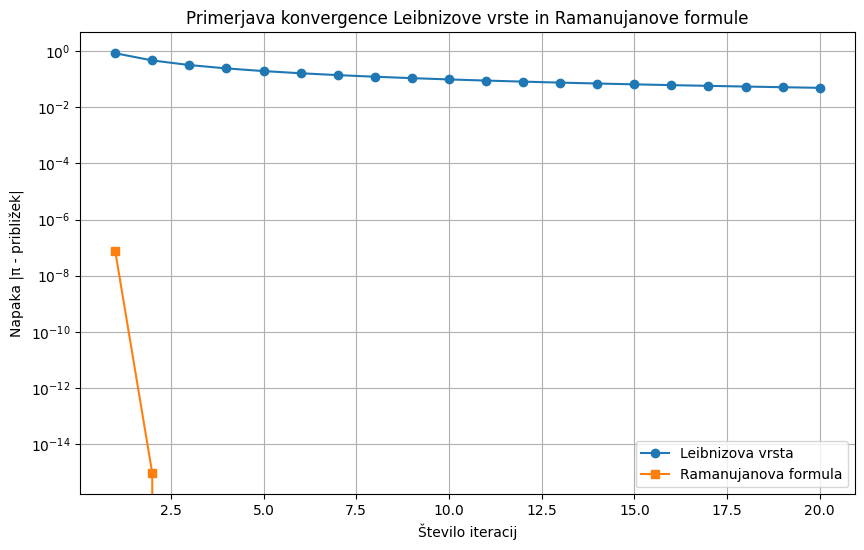

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, pi
from decimal import Decimal, getcontext


getcontext().prec = 50
niter = 20 


leibniz_values = []
leibniz_pi = 0
for n in range(1, niter+1):
    leibniz_pi += (1/(2*n-1)) * (-1)**(n+1) * 4
    leibniz_values.append(abs(leibniz_pi - pi))


ramanujan_values = []
ramanujan_sum = Decimal(0)
for k in range(0, niter+1):
    num = Decimal(factorial(4 * k)) * (1103 + 26390 * k)
    den = (Decimal(factorial(k)) ** 4) * (Decimal(396) ** (4 * k))
    ramanujan_sum += num / den
    pi_inverse = (Decimal(8).sqrt() / Decimal(9801)) * ramanujan_sum
    ramanujan_pi = 1 / pi_inverse
    ramanujan_values.append(abs(float(ramanujan_pi) - pi))


plt.figure(figsize=(10, 6))
plt.yscale("log") 
plt.plot(range(1, niter+1), leibniz_values, marker="o", linestyle="-", label="Leibnizova vrsta")
plt.plot(range(1, niter+1), ramanujan_values[:niter], marker="s", linestyle="-", label="Ramanujanova formula")
plt.xlabel("Število iteracij")
plt.ylabel("Napaka |π - približek|")
plt.title("Primerjava konvergence Leibnizove vrste in Ramanujanove formule")
plt.legend()
plt.grid(True)
plt.show()
